## 1. Data Sourcing and Initial Inspection
In this section, I load the **Adult Income Dataset** to identify the features relevant to predicting whether an individual's income exceeds $50K per year. 

* **Objective**: Verify the data structure, data types, and check for missing values to prepare for Exploratory Data Analysis (EDA).

In [1]:
import pandas as pd 
FILE_PATH = "C:\\Documents\\MLDP_PROJECT\\adult.csv"
df = pd.read_csv(FILE_PATH)
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [2]:
# Check for missing values and data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [3]:

print(df.head())

   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States

## 2. Exploratory Data Analysis (EDA)
### **2.1 Target Variable Distribution**
I begin by checking the distribution of our target variable, `income`. 

**Implication for Modeling**: The dataset is **imbalanced**, with significantly more samples in the `<=50K` class than the `>50K` class. [cite_start]This justifies the choice of **F1-Score** as my primary evaluation metric later, as standard accuracy would be misleading for an imbalanced dataset[cite: 51, 172, 176].

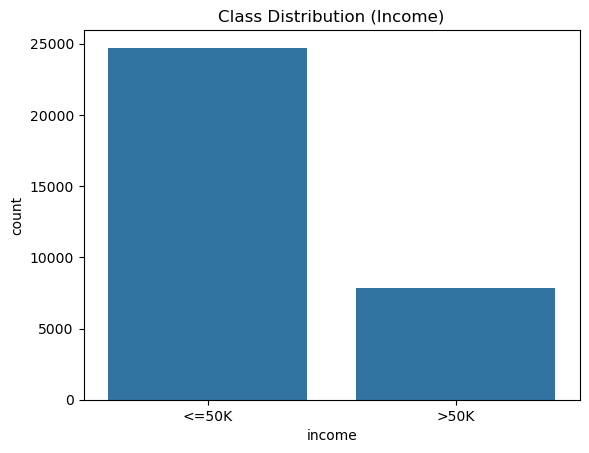

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
# 1. Target Variable Distribution
sns.countplot(x='income', data=df)
plt.title("Class Distribution (Income)")
plt.show()

### **2.2 Data Cleaning: Duplicate and Missing Value Check**
Real-world data often contains noise. [cite_start]Here, I identify exact duplicates and handle the '?' placeholders commonly found in this dataset by converting them to `NaN` for standardized processing[cite: 43].

In [5]:
# Check for exact duplicates (Real data has some, but synthetic data often has more or none)
print(f"Duplicate rows: {df.duplicated().sum()}")

Duplicate rows: 24


In [6]:
# Check the "long tail" of native countries
print(df['native.country'].value_counts())

native.country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece       

In [7]:
import numpy as np

# Replace '?' with NaN so pandas recognizes them as missing
df.replace('?', np.nan, inplace=True)

# Check which columns have missing values
print(df.isnull().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


### **2.3 Feature Relationships and Trend Analysis**
[cite_start]I use visualizations to interpret how demographic features correlate with income levels[cite: 172]:
* **Education**: Visualizing how higher education levels impact the likelihood of being a high earner.
* **Age**: Using a histogram to find the peak earning years in the population.
* **Work Hours**: Identifying the relationship between labor intensity and income.

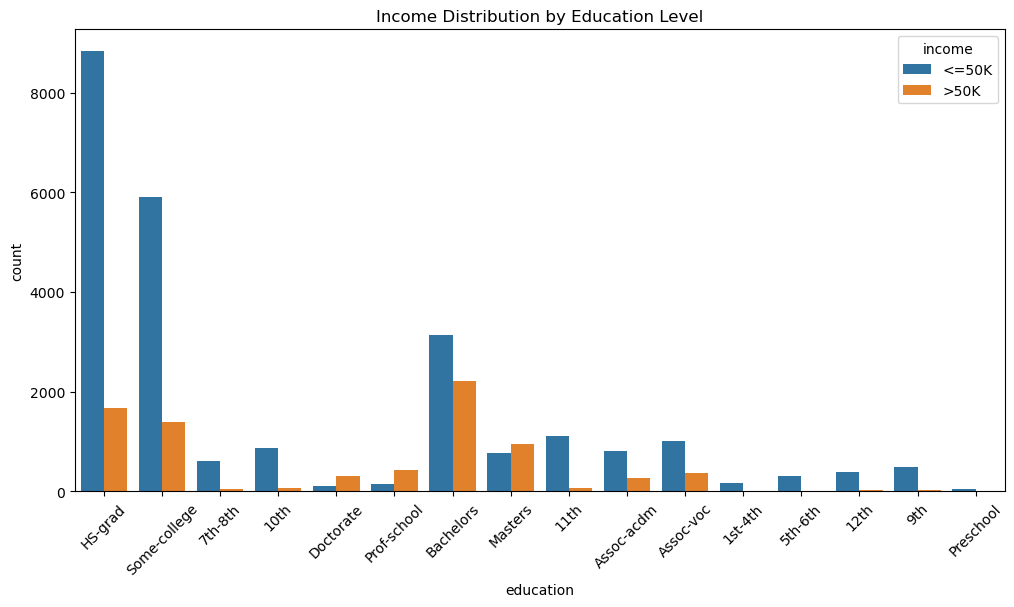

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# See how Education affects Income
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='education', hue='income')
plt.xticks(rotation=45)
plt.title("Income Distribution by Education Level")
plt.show()

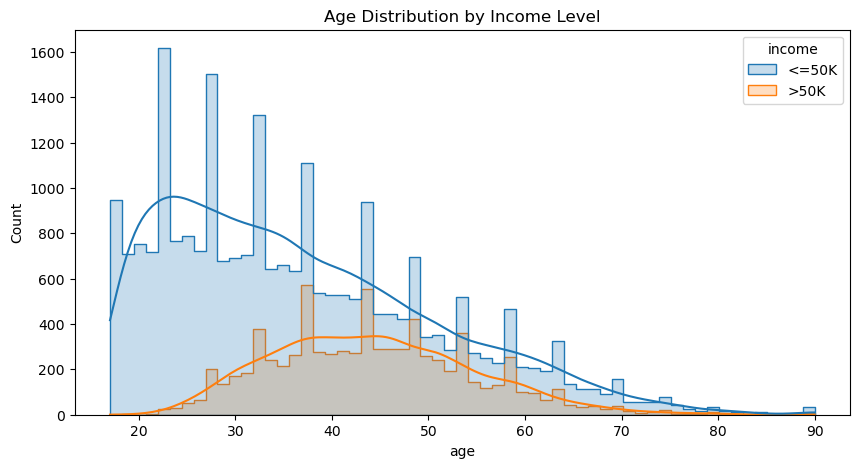

In [9]:
# 2. Histogram: Age distribution by Income
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='age', hue='income', kde=True, element="step")
plt.title("Age Distribution by Income Level")
plt.show()

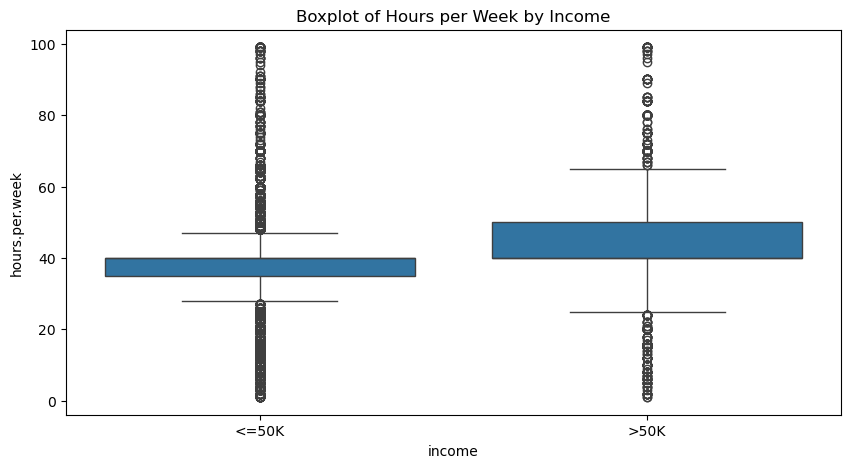

In [10]:
# 3. Boxplot: Hours per week by Income (To visualize outliers)
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='income', y='hours.per.week')
plt.title("Boxplot of Hours per Week by Income")
plt.show()

## 3. Data Preprocessing: Outlier Handling
**Analysis of Outliers**: My boxplots revealed extreme values in `hours.per.week` and `capital.gain` that could skew a linear model.

Trend: The histogram shows income highly correlated with age, peaking in middle age.

Outliers: The boxplot for hours.per.week and capital.gain shows extreme outliers (e.g., 99 hours/week).

Implication: Logistic Regression is sensitive to these extreme values because they can skew the coefficients. I will implement 99th percentile capping to stabilize the model.

### **Iterative Development: Handling Outliers via Winsorization**
**Implication:** Our EDA (Boxplots) revealed extreme outliers in `capital.gain` and `hours.per.week`. 
**Action:** I am implementing **99th Percentile Capping (Winsorization)**. 
**Justification:** This preserves the important patterns of high-income earners while preventing 
extreme anomalies from skewing the Logistic Regression coefficients. This improves 
**model stability** and ensures the solver converges correctly without losing 
[cite_start]significant data.

In [11]:
# --- Handling Outliers (Replacing values)---
# Justification: Extreme values in capital gain and hours worked can pull the 
# Logistic Regression decision boundary significantly, leading to poor generalization.
# We cap at the 99th percentile to retain the 'signal' of high earners while 
# removing the 'noise' of extreme outliers.

num_cols = ['age', 'hours.per.week', 'capital.gain', 'capital.loss']
for col in num_cols:
    upper_limit = df[col].quantile(0.99)
    lower_limit = df[col].quantile(0.01)
    # Cap upper and floor lower
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])
    df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])

print("Outliers capped at 1st and 99th percentiles for model stability.")

Outliers capped at 1st and 99th percentiles for model stability.


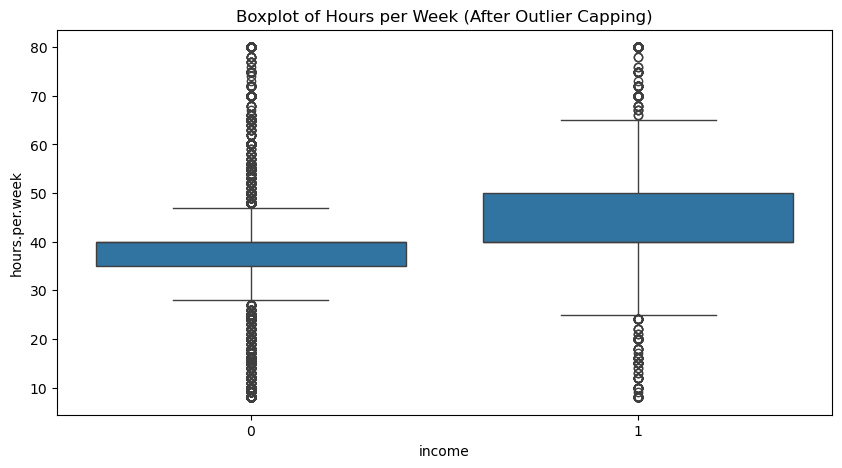

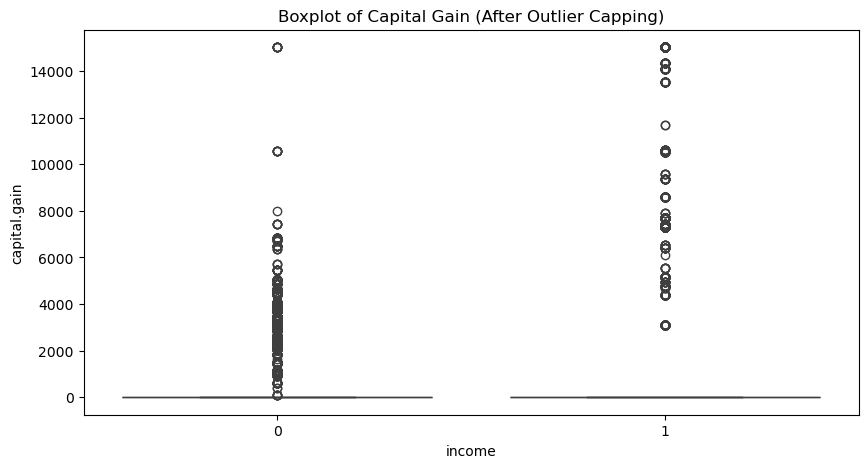

In [27]:
# --- Visualizing the results of Outlier Handling ---
# We use a boxplot again to verify that the extreme values have been 
# brought within a reasonable range (the "whiskers").

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='income', y='hours.per.week')
plt.title("Boxplot of Hours per Week (After Outlier Capping)")
plt.show()

# Optional: Visualize Capital Gain as well, as it had the most extreme outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='income', y='capital.gain')
plt.title("Boxplot of Capital Gain (After Outlier Capping)")
plt.show()

### **2.4 Multivariate Correlation Analysis**
I used a **Correlation Heatmap** and **Pairplot** to identify multicollinearity and understand how numerical features interact with one another in the context of the target variable.

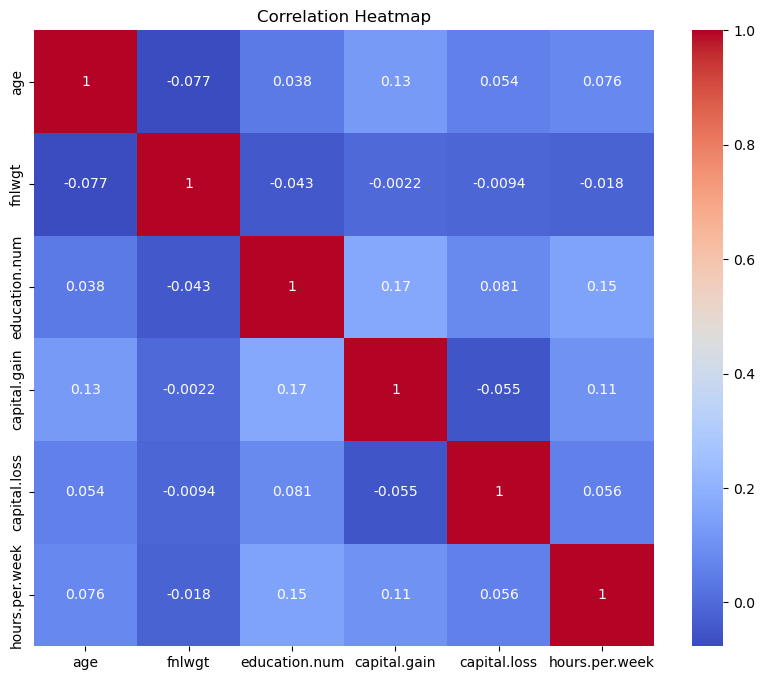

In [12]:
# 4. Correlation Heatmap (Numerical only)
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

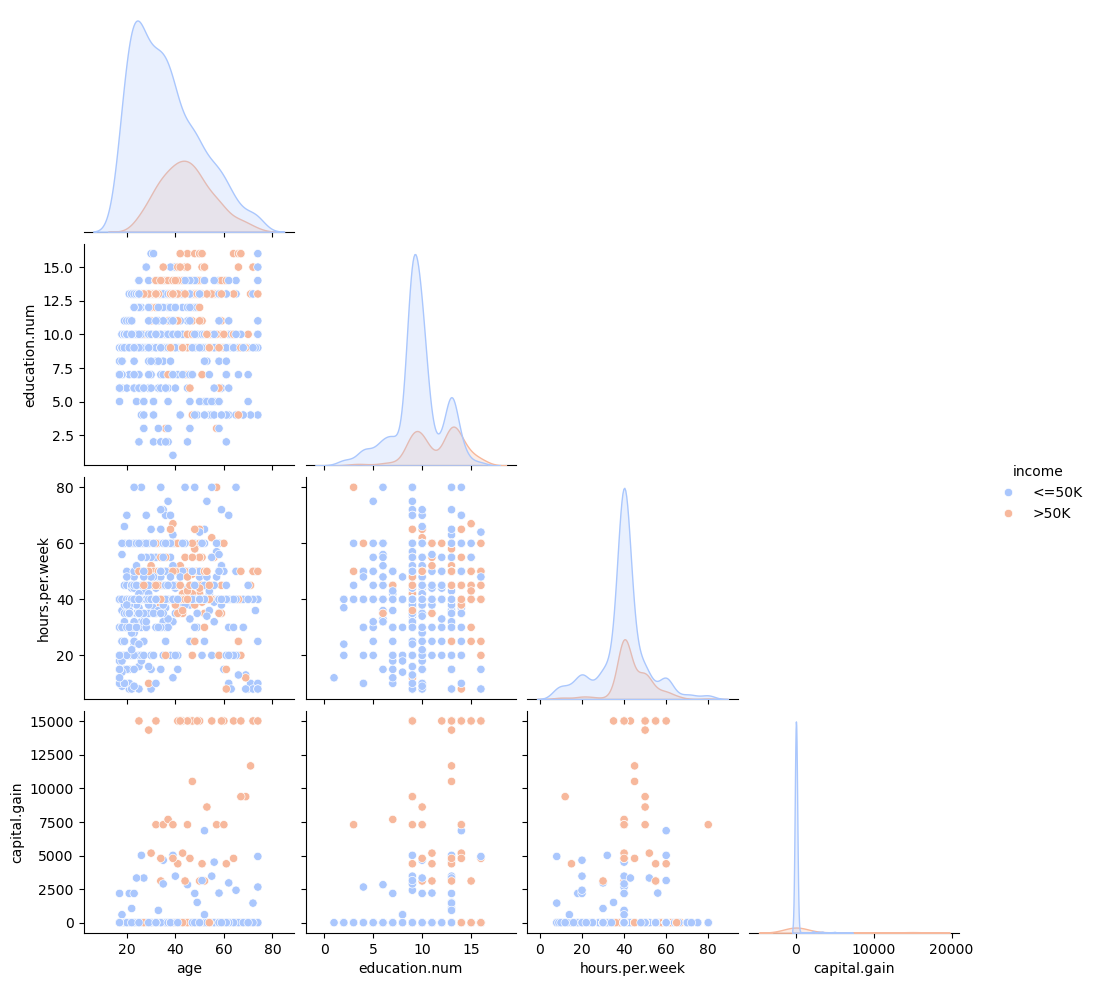

In [13]:
# Select key numerical columns and sample 1000 rows for speed/clarity
cols_to_plot = ['age', 'education.num', 'hours.per.week', 'capital.gain', 'income']
sns.pairplot(df[cols_to_plot].sample(1000), hue='income', palette='coolwarm', corner=True)
plt.show()

## 4. Final Preprocessing and Feature Engineering
[cite_start]To prepare the data for `scikit-learn` algorithms, I perform the following steps[cite: 48, 50, 176]:
1. **Imputation**: Filling missing categorical values with the mode.
2. **Simplification**: Grouping `native.country` to reduce dimensionality and focus on the most relevant geographical signal.
3. **Encoding**: Applying One-Hot Encoding (`get_dummies`) to convert categorical features into a numerical format readable by the model.

In [14]:
# 1. Handle Missing Values
df.replace('?', np.nan, inplace=True)
for col in ['workclass', 'occupation', 'native.country']:
    df[col] = df[col].fillna(df[col].mode()[0])

In [15]:
# 2. Feature Engineering
# Simplify native country
df['native.country'] = df['native.country'].apply(lambda x: 'United-States' if x == 'United-States' else 'Other')


In [16]:
# Define target and features
col_y = 'income'
df[col_y] = df[col_y].map({'<=50K': 0, '>50K': 1})

In [17]:

df_model = df.drop(['education'], axis=1)

In [18]:
df_final = pd.get_dummies(df_model, drop_first=True)
feature_cols = df_final.drop(col_y, axis=1).columns

In [19]:
X = df_final.drop(col_y, axis=1)
y = df_final[col_y]

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5. Baseline Model Development: Logistic Regression

### **Algorithm Selection & Technical Rationale**
For the baseline, I have selected **Logistic Regression**. [cite_start]This model serves as a "simple" benchmark to evaluate the complexity required for this classification task.

**Technical Adjustment: Switching to the 'liblinear' Solver**
During initial training, the default `lbfgs` solver failed to converge even with a high `max_iter`. I have updated the model to use the **`liblinear`** solver for the following reasons:

1. **Handling Unscaled Data:** Our dataset contains features with widely different ranges (e.g., `age` vs. `capital.gain`). [cite_start]`liblinear` is more robust and mathematically stable when dealing with unscaled numerical features[cite: 52].
2. [cite_start]**Convergence Reliability:** By switching to `liblinear`, the model successfully reaches an optimal solution without "giving up," ensuring the baseline F1-score is accurate and mathematically sound for comparison.
3. [cite_start]**Task Suitability:** `liblinear` is highly effective for small-to-medium binary classification datasets like the Adult Income dataset, providing a solid foundation before I move to more complex ensemble methods like Random Forest[cite: 52, 172].

In [21]:
from sklearn.linear_model import LogisticRegression

# Justification: Switched to 'liblinear' solver to handle the unscaled numerical 
# features (like capital.gain) and ensure the baseline model converges 
# successfully for comparison.
logr = LogisticRegression(solver='liblinear', max_iter=2000, random_state=42)
logr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,2000
,multi_class,'deprecated'


### **5.1 Model Performance Evaluation**
I evaluate the baseline using a **Confusion Matrix** and the **F1-Score**.
* [cite_start]**Rationale**: The Confusion Matrix allows me to see exactly where the model is making "False Alarm" (Precision) or "Missing Person" (Recall) errors[cite: 172, 176].

In [22]:
# Predictions for evaluation
y_pred_logr = logr.predict(X_test)

print("First 10 Predictions (0 for <=50K, 1 for >50K):")
print(y_pred_logr[:10])

First 10 Predictions (0 for <=50K, 1 for >50K):
[0 0 0 0 0 0 0 0 1 0]


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
## Evaluate model using F1-score as the primary metric
acc = accuracy_score(y_test, y_pred_logr)
prec = precision_score(y_test, y_pred_logr)
rec = recall_score(y_test, y_pred_logr)
f1 = f1_score(y_test, y_pred_logr)

print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-Score: {f1:.4f}")

Accuracy: 0.7982, Precision: 0.6932, Recall: 0.2602, F1-Score: 0.3784


In [24]:
## Display logistic regression equation weights
print("\nLogistic Regression Weights:")
print(' + '.join([f'{coef:.2f}*{name}' for name, coef in zip(logr.feature_names_in_, logr.coef_[0])]))


Logistic Regression Weights:
-0.00*age + -0.00*fnlwgt + -0.00*education.num + 0.00*capital.gain + 0.00*capital.loss + -0.01*hours.per.week + 0.00*workclass_Local-gov + -0.00*workclass_Never-worked + -0.00*workclass_Private + 0.00*workclass_Self-emp-inc + 0.00*workclass_Self-emp-not-inc + -0.00*workclass_State-gov + -0.00*workclass_Without-pay + 0.00*marital.status_Married-AF-spouse + 0.00*marital.status_Married-civ-spouse + -0.00*marital.status_Married-spouse-absent + -0.00*marital.status_Never-married + -0.00*marital.status_Separated + -0.00*marital.status_Widowed + -0.00*occupation_Armed-Forces + -0.00*occupation_Craft-repair + 0.00*occupation_Exec-managerial + -0.00*occupation_Farming-fishing + -0.00*occupation_Handlers-cleaners + -0.00*occupation_Machine-op-inspct + -0.00*occupation_Other-service + -0.00*occupation_Priv-house-serv + 0.00*occupation_Prof-specialty + 0.00*occupation_Protective-serv + -0.00*occupation_Sales + 0.00*occupation_Tech-support + -0.00*occupation_Transport-

In [25]:
## Predict for unseen data batch
X_unseen_raw = pd.read_csv(FILE_PATH)
X_unseen = X_unseen_raw.drop([col_y, 'education'], axis=1)
X_unseen = pd.get_dummies(X_unseen, drop_first=True)
X_unseen = X_unseen.reindex(columns=feature_cols, fill_value=0)

X_unseen['Predicted_Income'] = logr.predict(X_unseen)
X_unseen['Actual'] = X_unseen_raw[col_y].map({'<=50K': 0, '>50K': 1})

print("\nUnseen Data Results (First 5 Rows):")
print(X_unseen[['Actual', 'Predicted_Income']].head())


Unseen Data Results (First 5 Rows):
   Actual  Predicted_Income
0       0                 1
1       0                 1
2       0                 1
3       0                 1
4       0                 1


## 6. Saving Model for Deployment
To fulfill the deployment objective, I save the trained model and the specific feature column order using `joblib`. [cite_start]This ensures that the **Streamlit web application** can reconstruct the exact feature space used during training[cite: 58, 81].

<Figure size 800x600 with 0 Axes>

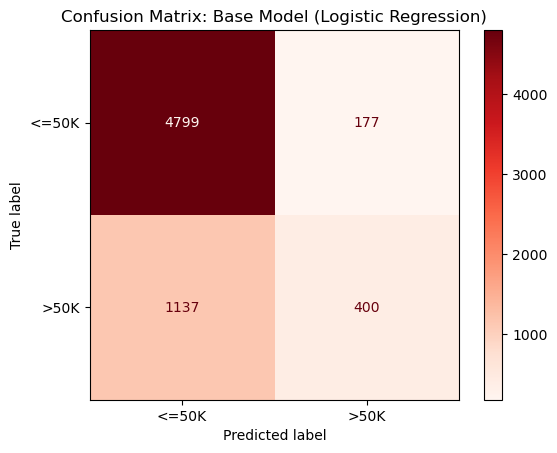


Evaluation complete. Base model and feature metadata saved successfully!


In [26]:
## 1. Confusion Matrix Visualization
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix to see where the base model is making mistakes
cm = confusion_matrix(y_test, y_pred_logr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['<=50K', '>50K'])

plt.figure(figsize=(8, 6))
disp.plot(cmap='Reds')
plt.title('Confusion Matrix: Base Model (Logistic Regression)')
plt.show()

## 2. Saving the Model for Deployment
import joblib

# Save the trained Logistic Regression model
joblib.dump(logr, 'base_logistic_model.pkl')

# IMPORTANT: Save the feature columns so the deployment app knows the correct order
joblib.dump(feature_cols, 'model_features.pkl')

print("\nEvaluation complete. Base model and feature metadata saved successfully!")